In [1]:
#****************************************************************************
# (C) Cloudera, Inc. 2020-2023
#  All rights reserved.
#
#  Applicable Open Source License: GNU Affero General Public License v3.0
#
#  NOTE: Cloudera open source products are modular software products
#  made up of hundreds of individual components, each of which was
#  individually copyrighted.  Each Cloudera open source product is a
#  collective work under U.S. Copyright Law. Your license to use the
#  collective work is as provided in your written agreement with
#  Cloudera.  Used apart from the collective work, this file is
#  licensed for your use pursuant to the open source license
#  identified above.
#
#  This code is provided to you pursuant a written agreement with
#  (i) Cloudera, Inc. or (ii) a third-party authorized to distribute
#  this code. If you do not have a written agreement with Cloudera nor
#  with an authorized and properly licensed third party, you do not
#  have any rights to access nor to use this code.
#
#  Absent a written agreement with Cloudera, Inc. (“Cloudera”) to the
#  contrary, A) CLOUDERA PROVIDES THIS CODE TO YOU WITHOUT WARRANTIES OF ANY
#  KIND; (B) CLOUDERA DISCLAIMS ANY AND ALL EXPRESS AND IMPLIED
#  WARRANTIES WITH RESPECT TO THIS CODE, INCLUDING BUT NOT LIMITED TO
#  IMPLIED WARRANTIES OF TITLE, NON-INFRINGEMENT, MERCHANTABILITY AND
#  FITNESS FOR A PARTICULAR PURPOSE; (C) CLOUDERA IS NOT LIABLE TO YOU,
#  AND WILL NOT DEFEND, INDEMNIFY, NOR HOLD YOU HARMLESS FOR ANY CLAIMS
#  ARISING FROM OR RELATED TO THE CODE; AND (D)WITH RESPECT TO YOUR EXERCISE
#  OF ANY RIGHTS GRANTED TO YOU FOR THE CODE, CLOUDERA IS NOT LIABLE FOR ANY
#  DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, PUNITIVE OR
#  CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO, DAMAGES
#  RELATED TO LOST REVENUE, LOST PROFITS, LOSS OF INCOME, LOSS OF
#  BUSINESS ADVANTAGE OR UNAVAILABILITY, OR LOSS OR CORRUPTION OF
#  DATA.
#
# #  Author(s): Paul de Fusco
#***************************************************************************/

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns
import cml.data_v1 as cmldata

In [6]:
# Sample in-code customization of spark configurations
from pyspark import SparkContext
SparkContext.setSystemProperty('spark.executor.cores', '2')
SparkContext.setSystemProperty('spark.executor.memory', '4g')

CONNECTION_NAME = "go01-aw-dl"
conn = cmldata.get_connection(CONNECTION_NAME)
spark = conn.get_spark_session()
username = os.environ["PROJECT_OWNER"]
dbname = "MLOPS"

Setting spark.hadoop.yarn.resourcemanager.principal to pauldefusco
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/07 03:43:07 WARN SparkConf: The configuration key 'spark.yarn.access.hadoopFileSystems' has been deprecated as of Spark 3.0 and may be removed in the future. Please use the new key 'spark.kerberos.access.hadoopFileSystems' instead.
23/12/07 03:43:08 WARN Utils: Service 'SparkUI' could not bind on port 20049. Attempting port 20050.
23/12/07 03:43:08 WARN Utils: Service 'SparkUI' could not bind on port 20050. Attempting port 20051.
23/12/07 03:43:11 WARN MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties
23/12/07 03:43:35 WARN HiveServer2CredentialProvider: Failed to get HS2 delegation token
java.util.NoSuchElementException: spark.sql.hive.hi

### Using PandasOnSpark for Data Exploration

In [7]:
import pyspark.pandas as ps
ps.set_option('compute.default_index_type', 'distributed')
df_from_sql_distributed = ps.read_table("{0}.BANKING_TRANSACTIONS_{1}".format(dbname, username))

23/12/07 03:43:47 WARN HiveClientImpl: Detected HiveConf hive.execution.engine is 'tez' and will be reset to 'mr' to disable useless hive logic
Hive Session ID = 04c20f60-c255-4581-9e8d-f554033181be
23/12/07 03:43:49 WARN HiveMetaStoreClient: Failed to connect to the MetaStore Server...


In [8]:
df_from_sql_distributed.head()

23/12/07 03:43:52 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,name,address,email,age,credit_card_balance,bank_account_balance,mortgage_balance,sec_bank_account_balance,savings_account_balance,sec_savings_account_balance,total_est_nworth,primary_loan_balance,secondary_loan_balance,college_loan_balance,aba_routing,bank_country,account_no,int_account_no,swift11,credit_card_number,credit_card_provider,event_type,longitude,latitude,transaction_currency,transaction_amount,fraud
0,Anna Nielsen,Unit 3575 Box 9075\nDPO AP 68229,tpark@lynch.org,75,21305,16840,28308,51828,355457,308440,474441,422,31642,6062,048724911,GB,JPNK03923598500802,GB32NHFO47640061531779,YNQKGB9EDI6,4446381674421787,VISA 13 digit,cash_advance,-15.0,52.0,USD,7717,YES
1,Linda Brewer,"PSC 4684, Box 6396\nAPO AE 60017",isaiahprice@sanders.org,87,4287,15265,596398,21743,402794,321811,316707,3748,367266,3497,035242053,GB,XCXP74373524900680,GB06ZWCK02788918986506,YAIZGBG5395,30021393235346,VISA 16 digit,purchase,18.0,72.0,EUR,6343,NO
2,Destiny Gonzalez,"262 Martin Summit\nMasseyfort, NE 18883",petersenrichard@brown.com,90,15322,137,858722,22198,298947,363054,247698,1551,418030,6641,105712976,GB,YMSH22724261069270,GB81ZMFS44089059896435,NQCDGBYHCJ5,4145907181506,American Express,purchase,1.0,10.0,KWD,9962,NO
3,Derek Ross,"54776 Jeffrey Field\nTammyport, PR 91337",ballen@wright-nelson.com,62,8093,6776,919655,55062,370276,70806,132810,4534,337194,314,048340793,GB,LHKR41860920715484,GB32RYDF09810119235681,OTKZGBNT9C9,3503447266508505,JCB 16 digit,purchase,125.0,15.0,BHD,243,YES
4,Ricky Decker,"85567 Smith Avenue\nLake Deborah, MH 53437",jessica45@reed-castaneda.com,22,6363,59697,594999,44478,184480,282373,361227,3380,2801,2506,082479989,GB,SPXV98613458317804,GB65TXSQ91214381371229,WHYQGB0T17J,4628254695962438,JCB 16 digit,purchase,117.0,3.0,GBP,26336,YES


### Check Spark UI and Spark Explain

In [9]:
import os
print("https://spark-"+os.environ["CDSW_ENGINE_ID"]+"."+os.environ["CDSW_DOMAIN"])

https://spark-trfv30j0nr2dlyrh.ml-b74f8940-b97.go01-dem.ylcu-atmi.cloudera.site


In [10]:
df_from_sql_distributed.spark.explain()

== Physical Plan ==
*(1) Project [monotonically_increasing_id() AS __index_level_0__#54L, name#0, address#1, email#2, age#3, credit_card_balance#4, bank_account_balance#5, mortgage_balance#6, sec_bank_account_balance#7, savings_account_balance#8, sec_savings_account_balance#9, total_est_nworth#10, primary_loan_balance#11, secondary_loan_balance#12, college_loan_balance#13, aba_routing#14, bank_country#15, account_no#16, int_account_no#17, swift11#18, credit_card_number#19, credit_card_provider#20, event_type#21, longitude#22, ... 4 more fields]
+- *(1) ColumnarToRow
   +- BatchScan Iceberg spark_catalog.MLOPS.BANKING_TRANSACTIONS_pauldefusco[name#0, address#1, email#2, age#3, credit_card_balance#4, bank_account_balance#5, mortgage_balance#6, sec_bank_account_balance#7, savings_account_balance#8, sec_savings_account_balance#9, total_est_nworth#10, primary_loan_balance#11, secondary_loan_balance#12, college_loan_balance#13, aba_routing#14, bank_country#15, account_no#16, int_account_no#1

### Data Exploration

In [11]:
counts = df_from_sql_distributed[['credit_card_number','fraud']].groupby("fraud").count()

In [20]:
pdf = counts.to_pandas()
print(type(pdf))

<class 'pandas.core.frame.DataFrame'>


In [21]:
pdf

,credit_card_number
fraud,
YES,8989
NO,1011


In [25]:
pdf.columns = pdf.columns.get_level_values(0)
pdf.head()

,credit_card_number
fraud,
YES,8989
NO,1011


In [14]:
import seaborn as sns

In [31]:
pdf.T

fraud,YES,NO
credit_card_number,8989,1011


<Axes: xlabel='fraud', ylabel='count'>

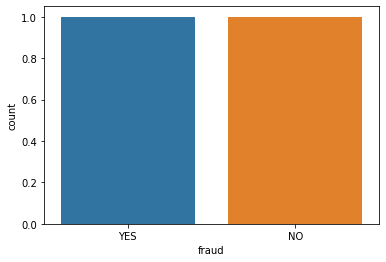

In [30]:
sns.countplot(pdf.T)

### Track Iceberg Metadata